In [338]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [339]:
monthly = pd.read_csv('monthly.csv')

In [340]:
monthly['month'] = pd.to_datetime(monthly['month'])
monthly = monthly.set_index('month')

In [341]:
monthly.head()

,sales,onpromotion,is_holiday,month_num,year,lag_1,lag_12,rolling_3,rolling_6
month,,,,,,,,,
2014-01-01,291664.751474,0,33.0,1,2014,202431.688007,156864.199004,222062.017166,188643.427590
2014-02-01,159458.498923,0,0.0,2,2014,291664.751474,129814.332014,217851.646135,190355.958585
2014-03-01,273914.544883,0,99.0,3,2014,159458.498923,151666.227994,241679.265093,210662.469395
2014-04-01,173138.393132,0,165.0,4,2014,273914.544883,155848.493959,202170.478979,212116.248073
2014-05-01,181408.251539,0,165.0,5,2014,173138.393132,156870.205004,209487.063185,213669.354660


In [342]:
monthly.index

DatetimeIndex(['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01'],
              dtype='datetime64[ns]', name='month', freq=None)

In [343]:
ts = monthly['sales']

In [344]:
## Splitting the data
## Forecast 3 months
train = ts.iloc[:-4]
test = ts.iloc[-4:-1]

In [345]:
# exog_train = train[['onpromotion', 'is_holiday']]
# exog_test  = test[['onpromotion', 'is_holiday']]


In [346]:
## Training model
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(
    train,
    order=(1,1,1),
    seasonal_order=(1,1,1,12)
)

C:\Users\lenovo\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [347]:
model_fit = model.fit()

C:\Users\lenovo\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [348]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              sales   No. Observations:                   40
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -325.587
Date:                            Fri, 12 Dec 2025   AIC                            661.174
Time:                                    19:27:49   BIC                            667.653
Sample:                                01-01-2014   HQIC                           663.101
                                     - 04-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9076      0.388     -2.337      0.019      -1.669      -0.147
ma.L1          0.7453      0.561      1.329      0.184      -0.354       1.845
ar.S.L12       0.0695      0.685      0.101      0.919      -1.274       1.413
ma.S.L12      -0.5689      0.838     -0.678      0.497      -2.212       1.075
sigma2      3.012e+09   4.93e-10   6.11e+18      0.000    3.01e+09    3.01e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 2.78
Prob(Q):                              0.79   Prob(JB):                         0.25
Heteroskedasticity (H):               0.50   Skew:                            -0.41
Prob(H) (two-sided):                  0.31   Kurtosis:                         4.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.8e+34. Standard errors may be unstable.
"""

In [349]:
forecast = model_fit.forecast(steps=3)
forecast


2017-05-01    321086.432331
2017-06-01    333790.225774
2017-07-01    347374.894057
Freq: MS, Name: predicted_mean, dtype: float64

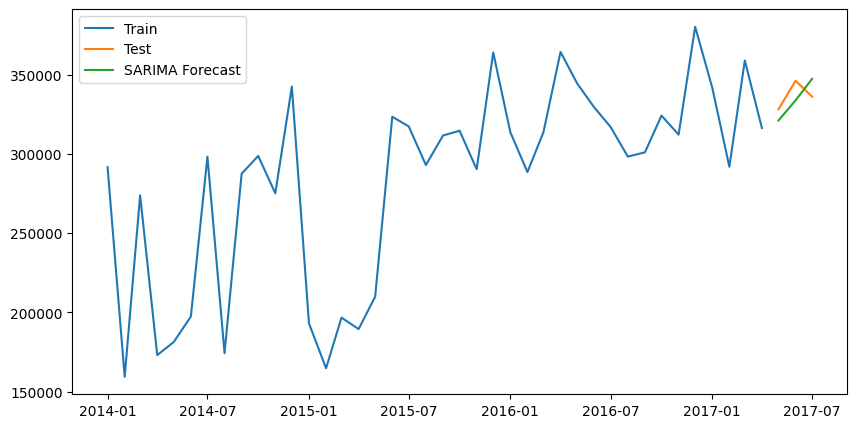

In [350]:
plt.figure(figsize=(10,5))
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(forecast, label="SARIMA Forecast")
plt.legend()
plt.show()


In [351]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
r2 = r2_score(test, forecast)
rmse = mse ** 0.5

mae, rmse, r2


(10207.502632993894, 10455.826014747961, -1.0257997484114667)

In [352]:
from pmdarima import auto_arima

auto_model = auto_arima(
    train,
    seasonal=True,
    m=12,
    trace=True,
    error_action='ignore',
    suppress_warnings=True
)

auto_model.summary()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=3.33 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=975.974, Time=0.08 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=963.657, Time=0.35 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=962.470, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=973.991, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=961.355, Time=0.28 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=962.169, Time=0.43 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=964.053, Time=0.50 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=963.351, Time=0.25 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=961.883, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=964.282, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=960.564, Time=0.07 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=962.082, Time=0.10 sec
 ARIMA(0,1,1)(0,0,1)[12]             : AI

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   40
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -478.124
Date:                Fri, 12 Dec 2025   AIC                            960.248
Time:                        19:28:00   BIC                            963.576
Sample:                    01-01-2014   HQIC                           961.442
                         - 04-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4634      0.110     -4.230      0.000      -0.678      -0.249
sigma2      2.674e+09   1.32e-12   2.02e+21      0.000    2.67e+09    2.67e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 0.06
Prob(Q):                              0.70   Prob(JB):                         0.97
Heteroskedasticity (H):               0.28   Skew:                            -0.07
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [353]:
order = auto_model.order
seasonal_order = auto_model.seasonal_order

model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
model_fit = model.fit()


C:\Users\lenovo\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [354]:
pred = model_fit.get_forecast(steps=3)
predicted = pred.predicted_mean


In [355]:
predicted = pd.DataFrame(predicted)
predicted['months'] = predicted.index
predicted= predicted.reset_index()
predicted = predicted.drop('index',axis=1)

In [356]:
predicted

,predicted_mean,months
0,336088.509814,2017-05-01
1,326941.407888,2017-06-01
2,331179.900400,2017-07-01


In [357]:
test.head()

month
2017-05-01    328151.918766
2017-06-01    346109.645122
2017-07-01    336137.291941
Name: sales, dtype: float64

In [358]:
test

month
2017-05-01    328151.918766
2017-06-01    346109.645122
2017-07-01    336137.291941
Name: sales, dtype: float64

In [359]:
test = pd.DataFrame(test)
test['months'] = test.index
test= test.reset_index()
test = test.drop('month',axis=1)

In [360]:
test

,sales,months
0,328151.918766,2017-05-01
1,346109.645122,2017-06-01
2,336137.291941,2017-07-01


In [361]:
predicted

,predicted_mean,months
0,336088.509814,2017-05-01
1,326941.407888,2017-06-01
2,331179.900400,2017-07-01


In [362]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

mae = mean_absolute_error(comparison['sales'], comparison['predicted_mean'])
mape = mean_absolute_percentage_error(comparison['sales'], comparison['predicted_mean'])
print("MAE:", mae)
print("MAPE:", mape)
print("ACCURACY :", 1- mape)


MAE: 10687.40660771716
MAPE: 0.03143860553383887
ACCURACY : 0.9685613944661611


In [363]:
## SARIMA MODEL

pred = predicted[['months', 'predicted_mean']].tail(3)
comparison = test[['months', 'sales']].merge(pred, on='months')
comparison



,months,sales,predicted_mean
0,2017-05-01,328151.918766,336088.509814
1,2017-06-01,346109.645122,326941.407888
2,2017-07-01,336137.291941,331179.900400


### SARIMA MODEL

##### SARIMA was able to capture basic trends and seasonality in the monthly sales data.The predictions followed the overall pattern of the actual data.However, SARIMA struggled with: sudden changes or non-linear variations long-term trend shifts multi-seasonal patterns. As a result, evaluation metrics like R² were low, even though the predicted values were visually close to actual values.